# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew
from subprocess import check_output

import datetime

In [2]:
# loading our data file

df = pd.read_csv(r'C:\Users\Lenovo\Desktop\python\BI BPO project\february_data.csv')

# Loading our dataframe

In [3]:
df

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server
0,AA0101,34536,0.0,0,PS,990201,07:02:47,07:02:56,00:00:00,00:00:00,AGENT,07:02:55,07:05:41,DORIT
1,AA0101,34537,0.0,0,PS,990201,07:31:45,07:31:55,00:00:00,00:00:00,AGENT,07:31:54,07:31:59,NO_SERVER
2,AA0101,34538,0.0,0,NW,990201,07:54:38,07:54:51,00:00:00,00:00:00,AGENT,07:54:49,07:56:21,TOVA
3,AA0101,34539,23317894.0,2,PS,990201,08:09:16,08:09:22,08:09:22,08:09:27,HANG,00:00:00,00:00:00,NO_SERVER
4,AA0101,34540,48178511.0,2,PS,990201,08:19:42,08:19:47,08:19:47,08:20:21,AGENT,08:20:20,08:22:04,MICHAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,AA0216,5607,0.0,0,IN,990226,14:14:43,14:15:05,00:00:00,00:00:00,HANG,00:00:00,00:00:00,NO_SERVER
33340,AA0216,5608,0.0,0,IN,990226,14:33:45,14:33:50,00:00:00,00:00:00,HANG,00:00:00,00:00:00,NO_SERVER
33341,AA0216,5609,0.0,0,IN,990228,11:29:39,11:29:48,11:29:48,11:33:39,HANG,00:00:00,00:00:00,NO_SERVER
33342,AA0216,5610,0.0,0,IN,990228,12:18:20,12:18:30,12:18:30,12:18:49,AGENT,12:18:48,12:22:54,YITZ


In [4]:
df.shape

(33344, 14)

In [5]:
df.columns

Index(['vru+line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'q_start', 'q_exit', 'outcome', 'ser_start',
       'ser_exit', 'server'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33344 entries, 0 to 33343
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vru+line     33344 non-null  object 
 1   call_id      33344 non-null  int64  
 2   customer_id  33344 non-null  float64
 3   priority     33344 non-null  int64  
 4   type         33344 non-null  object 
 5   date         33344 non-null  int64  
 6   vru_entry    33344 non-null  object 
 7   vru_exit     33344 non-null  object 
 8   q_start      33344 non-null  object 
 9   q_exit       33344 non-null  object 
 10  outcome      33344 non-null  object 
 11  ser_start    33344 non-null  object 
 12  ser_exit     33344 non-null  object 
 13  server       33344 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 3.6+ MB


In [7]:
# Date has an integer datatype which must be changed

df['date'] = pd.to_datetime(df['date'], format='%y%m%d')

There are a few columns which need to be changed to Timestamp datatype such as:
- vru_entry
- vru_exit
- q_start
- q_exit
- ser_start
- ser_exit

In [8]:
df['vru_entry'] = pd.to_datetime(df.vru_entry)

In [9]:
df['vru_exit'] = pd.to_datetime(df.vru_exit)

In [10]:
df['q_start'] = pd.to_datetime(df.q_start)
df['q_exit'] = pd.to_datetime(df.q_exit)
df['ser_start'] = pd.to_datetime(df.ser_start)
df['ser_exit'] = pd.to_datetime(df.ser_exit)

In [11]:
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server
0,AA0101,34536,0.0,0,PS,1999-02-01,2023-02-26 07:02:47,2023-02-26 07:02:56,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:02:55,2023-02-26 07:05:41,DORIT
1,AA0101,34537,0.0,0,PS,1999-02-01,2023-02-26 07:31:45,2023-02-26 07:31:55,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:31:54,2023-02-26 07:31:59,NO_SERVER
2,AA0101,34538,0.0,0,NW,1999-02-01,2023-02-26 07:54:38,2023-02-26 07:54:51,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:54:49,2023-02-26 07:56:21,TOVA
3,AA0101,34539,23317894.0,2,PS,1999-02-01,2023-02-26 08:09:16,2023-02-26 08:09:22,2023-02-26 08:09:22,2023-02-26 08:09:27,HANG,2023-02-26 00:00:00,2023-02-26 00:00:00,NO_SERVER
4,AA0101,34540,48178511.0,2,PS,1999-02-01,2023-02-26 08:19:42,2023-02-26 08:19:47,2023-02-26 08:19:47,2023-02-26 08:20:21,AGENT,2023-02-26 08:20:20,2023-02-26 08:22:04,MICHAL


# Creating a new column 'vru_time'

In [12]:
df['vru_time'] = df['vru_exit'] - df['vru_entry']

# Creating a new column 'q_time'

In [13]:
df['q_time'] = df['q_exit'] - df['q_start']

# Creating a new column 'ser_time'

In [14]:
df['ser_time'] = df['ser_exit'] - df['ser_start']

In [15]:
df.dtypes

vru+line                object
call_id                  int64
customer_id            float64
priority                 int64
type                    object
date            datetime64[ns]
vru_entry       datetime64[ns]
vru_exit        datetime64[ns]
q_start         datetime64[ns]
q_exit          datetime64[ns]
outcome                 object
ser_start       datetime64[ns]
ser_exit        datetime64[ns]
server                  object
vru_time       timedelta64[ns]
q_time         timedelta64[ns]
ser_time       timedelta64[ns]
dtype: object

# Let's check our dataframe with all newly calculated columns

In [16]:
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
0,AA0101,34536,0.0,0,PS,1999-02-01,2023-02-26 07:02:47,2023-02-26 07:02:56,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:02:55,2023-02-26 07:05:41,DORIT,0 days 00:00:09,0 days 00:00:00,0 days 00:02:46
1,AA0101,34537,0.0,0,PS,1999-02-01,2023-02-26 07:31:45,2023-02-26 07:31:55,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:31:54,2023-02-26 07:31:59,NO_SERVER,0 days 00:00:10,0 days 00:00:00,0 days 00:00:05
2,AA0101,34538,0.0,0,NW,1999-02-01,2023-02-26 07:54:38,2023-02-26 07:54:51,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:54:49,2023-02-26 07:56:21,TOVA,0 days 00:00:13,0 days 00:00:00,0 days 00:01:32
3,AA0101,34539,23317894.0,2,PS,1999-02-01,2023-02-26 08:09:16,2023-02-26 08:09:22,2023-02-26 08:09:22,2023-02-26 08:09:27,HANG,2023-02-26 00:00:00,2023-02-26 00:00:00,NO_SERVER,0 days 00:00:06,0 days 00:00:05,0 days 00:00:00
4,AA0101,34540,48178511.0,2,PS,1999-02-01,2023-02-26 08:19:42,2023-02-26 08:19:47,2023-02-26 08:19:47,2023-02-26 08:20:21,AGENT,2023-02-26 08:20:20,2023-02-26 08:22:04,MICHAL,0 days 00:00:05,0 days 00:00:34,0 days 00:01:44


# Checking for null values 

In [17]:
df.isnull().sum()

vru+line       0
call_id        0
customer_id    0
priority       0
type           0
date           0
vru_entry      0
vru_exit       0
q_start        0
q_exit         0
outcome        0
ser_start      0
ser_exit       0
server         0
vru_time       0
q_time         0
ser_time       0
dtype: int64

# Creating a new column as "customer_type"

In [18]:
ls = [] #empty list

for i in df.priority:
    if i == 0:
        ls.append('Unidentified')
    elif i == 1:
        ls.append('Regular')
    else:
        ls.append('Priority')
        

# We are creating a new column in our dataframe where we could easily check the user type
df['customer_type'] = ls    

In [19]:
# let's check our dataframe for the new column

df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time,customer_type
0,AA0101,34536,0.0,0,PS,1999-02-01,2023-02-26 07:02:47,2023-02-26 07:02:56,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:02:55,2023-02-26 07:05:41,DORIT,0 days 00:00:09,0 days 00:00:00,0 days 00:02:46,Unidentified
1,AA0101,34537,0.0,0,PS,1999-02-01,2023-02-26 07:31:45,2023-02-26 07:31:55,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:31:54,2023-02-26 07:31:59,NO_SERVER,0 days 00:00:10,0 days 00:00:00,0 days 00:00:05,Unidentified
2,AA0101,34538,0.0,0,NW,1999-02-01,2023-02-26 07:54:38,2023-02-26 07:54:51,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:54:49,2023-02-26 07:56:21,TOVA,0 days 00:00:13,0 days 00:00:00,0 days 00:01:32,Unidentified
3,AA0101,34539,23317894.0,2,PS,1999-02-01,2023-02-26 08:09:16,2023-02-26 08:09:22,2023-02-26 08:09:22,2023-02-26 08:09:27,HANG,2023-02-26 00:00:00,2023-02-26 00:00:00,NO_SERVER,0 days 00:00:06,0 days 00:00:05,0 days 00:00:00,Priority
4,AA0101,34540,48178511.0,2,PS,1999-02-01,2023-02-26 08:19:42,2023-02-26 08:19:47,2023-02-26 08:19:47,2023-02-26 08:20:21,AGENT,2023-02-26 08:20:20,2023-02-26 08:22:04,MICHAL,0 days 00:00:05,0 days 00:00:34,0 days 00:01:44,Priority


# --------------------------------------------------------------------------------------------------------------

# Calculating total VRU time in seconds

In [20]:
total_vru_secs = df['vru_time'].sum().total_seconds()
total_vru_secs

348907.0

	VRU Call charges: 
        
▪				Calls handled by VRU are not billed to RBS upto a duration of 120,000 seconds 

▪				From 120,001st second onwards, VRU calls are charged at EUR 0.5/ second.


# Chargeable VRU time :

In [21]:
free_vru_secs = 120000 # as given in the statement

# Calculating the chargeable time of VRU -

Chargeable_vru_secs = total_vru_secs - free_vru_secs 
Chargeable_vru_secs

228907.0

In [22]:
if Chargeable_vru_secs > free_vru_secs :	
    vru_amount = Chargeable_vru_secs * 0.5
    print("VRU bill is =",vru_amount)
elif Chargeable_vru_secs < 120000:
    vru_amount = 0
    print("VRU bill is ",vru_amount)

VRU bill is = 114453.5


# --------------------------------------------------------------------------------------------------------------

# Caclulating Service Time Charges

Service Time Charges: 
    
▪	Upto a total of 30,00,000 seconds, the RBS is billed at EUR 0.5/ second

▪	From 30,00,001st seconds onwards, the bill is raised at EUR 1/ second.

In [23]:
# Calculating total service time in seconds

total_st_secs = df['ser_time'].sum().total_seconds()
total_st_secs

3430617.0

In [24]:
# Till 3000000 secs, it billed as 0.5 euro per second
# And from 3000001 secs, it is billed as 1 euro per second

st_secs_for_1_pound = total_st_secs - 3000000
st_secs_for_1_pound

430617.0

In [25]:
# Calculating total amount for Service time

if total_st_secs >= 3000001:
    st_amount = (st_secs_for_1_pound * 1) + (3000000 * 0.5)
    print("Service time bill is :",st_amount)
elif total_st_secs <= 3000000:
    st_amount = total_st_secs * 0.5
    print("Service time bill is =",st_amount)

Service time bill is : 1930617.0


# ----------------------------------------------------------------------------------------------------

# Calculating q-time 

In [26]:
# Calculating q_time in minutes

round((df['q_time'].sum().total_seconds())/60)

20345

In [27]:
# Calculating penalty on q_time

penalty_ls = [] 

for i in df.q_time:
    if i <= datetime.timedelta(minutes=1):
        penalty_ls.append(0)
    elif i > datetime.timedelta(minutes=1) and i <= datetime.timedelta(minutes=3):
        penalty_ls.append(0.5)
    elif i > datetime.timedelta(minutes=3) and i <= datetime.timedelta(minutes=5):
        penalty_ls.append(1)
    elif i > datetime.timedelta(minutes=5):
        penalty_ls.append(2)
        
df['penalty_on_qtime'] = penalty_ls
df.head(3)

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time,customer_type,penalty_on_qtime
0,AA0101,34536,0.0,0,PS,1999-02-01,2023-02-26 07:02:47,2023-02-26 07:02:56,2023-02-26,2023-02-26,AGENT,2023-02-26 07:02:55,2023-02-26 07:05:41,DORIT,0 days 00:00:09,0 days,0 days 00:02:46,Unidentified,0.0
1,AA0101,34537,0.0,0,PS,1999-02-01,2023-02-26 07:31:45,2023-02-26 07:31:55,2023-02-26,2023-02-26,AGENT,2023-02-26 07:31:54,2023-02-26 07:31:59,NO_SERVER,0 days 00:00:10,0 days,0 days 00:00:05,Unidentified,0.0
2,AA0101,34538,0.0,0,NW,1999-02-01,2023-02-26 07:54:38,2023-02-26 07:54:51,2023-02-26,2023-02-26,AGENT,2023-02-26 07:54:49,2023-02-26 07:56:21,TOVA,0 days 00:00:13,0 days,0 days 00:01:32,Unidentified,0.0


In [28]:
# Calculating total q_time penalty

total_penalty_ls = [] # empty list


# calculating the total penalty based on the q-time:
for i in df.index:
    total_penalty_ls.append(round((df['q_time'][i].total_seconds()/60)* (df['penalty_on_qtime'][i]),2))
    
# Adding a new column to the dataframe:
df['total_qtime_penalty'] = total_penalty_ls

In [29]:
df

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time,customer_type,penalty_on_qtime,total_qtime_penalty
0,AA0101,34536,0.0,0,PS,1999-02-01,2023-02-26 07:02:47,2023-02-26 07:02:56,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:02:55,2023-02-26 07:05:41,DORIT,0 days 00:00:09,0 days 00:00:00,0 days 00:02:46,Unidentified,0.0,0.00
1,AA0101,34537,0.0,0,PS,1999-02-01,2023-02-26 07:31:45,2023-02-26 07:31:55,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:31:54,2023-02-26 07:31:59,NO_SERVER,0 days 00:00:10,0 days 00:00:00,0 days 00:00:05,Unidentified,0.0,0.00
2,AA0101,34538,0.0,0,NW,1999-02-01,2023-02-26 07:54:38,2023-02-26 07:54:51,2023-02-26 00:00:00,2023-02-26 00:00:00,AGENT,2023-02-26 07:54:49,2023-02-26 07:56:21,TOVA,0 days 00:00:13,0 days 00:00:00,0 days 00:01:32,Unidentified,0.0,0.00
3,AA0101,34539,23317894.0,2,PS,1999-02-01,2023-02-26 08:09:16,2023-02-26 08:09:22,2023-02-26 08:09:22,2023-02-26 08:09:27,HANG,2023-02-26 00:00:00,2023-02-26 00:00:00,NO_SERVER,0 days 00:00:06,0 days 00:00:05,0 days 00:00:00,Priority,0.0,0.00
4,AA0101,34540,48178511.0,2,PS,1999-02-01,2023-02-26 08:19:42,2023-02-26 08:19:47,2023-02-26 08:19:47,2023-02-26 08:20:21,AGENT,2023-02-26 08:20:20,2023-02-26 08:22:04,MICHAL,0 days 00:00:05,0 days 00:00:34,0 days 00:01:44,Priority,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,AA0216,5607,0.0,0,IN,1999-02-26,2023-02-26 14:14:43,2023-02-26 14:15:05,2023-02-26 00:00:00,2023-02-26 00:00:00,HANG,2023-02-26 00:00:00,2023-02-26 00:00:00,NO_SERVER,0 days 00:00:22,0 days 00:00:00,0 days 00:00:00,Unidentified,0.0,0.00
33340,AA0216,5608,0.0,0,IN,1999-02-26,2023-02-26 14:33:45,2023-02-26 14:33:50,2023-02-26 00:00:00,2023-02-26 00:00:00,HANG,2023-02-26 00:00:00,2023-02-26 00:00:00,NO_SERVER,0 days 00:00:05,0 days 00:00:00,0 days 00:00:00,Unidentified,0.0,0.00
33341,AA0216,5609,0.0,0,IN,1999-02-28,2023-02-26 11:29:39,2023-02-26 11:29:48,2023-02-26 11:29:48,2023-02-26 11:33:39,HANG,2023-02-26 00:00:00,2023-02-26 00:00:00,NO_SERVER,0 days 00:00:09,0 days 00:03:51,0 days 00:00:00,Unidentified,1.0,3.85
33342,AA0216,5610,0.0,0,IN,1999-02-28,2023-02-26 12:18:20,2023-02-26 12:18:30,2023-02-26 12:18:30,2023-02-26 12:18:49,AGENT,2023-02-26 12:18:48,2023-02-26 12:22:54,YITZ,0 days 00:00:10,0 days 00:00:19,0 days 00:04:06,Unidentified,0.0,0.00


# -------------------------------------------------------------------------------------------------------------

# Calculating Call-Disconnection Penalty :

In [30]:
call_dis_ls = []


# Calculating penalty based on call disconnection:
for i in df.index:
    if df[['outcome','server']].iloc[i][0] == 'AGENT' and df[['outcome','server']].iloc[i][1] == 'NO_SERVER':
        call_dis_ls.append(10)
    elif df[['outcome','server']].iloc[i][0] == 'HANG' and df[['outcome','server']].iloc[i][1] == 'NO_SERVER':
        call_dis_ls.append(5)
    else:
        call_dis_ls.append(0)
        
        
# Adding a new column to the dataframe:
df['call_dis_penalty'] = call_dis_ls

In [31]:
df['total_penalty'] = df['total_qtime_penalty'] + df['call_dis_penalty']

In [32]:
df

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,...,ser_exit,server,vru_time,q_time,ser_time,customer_type,penalty_on_qtime,total_qtime_penalty,call_dis_penalty,total_penalty
0,AA0101,34536,0.0,0,PS,1999-02-01,2023-02-26 07:02:47,2023-02-26 07:02:56,2023-02-26 00:00:00,2023-02-26 00:00:00,...,2023-02-26 07:05:41,DORIT,0 days 00:00:09,0 days 00:00:00,0 days 00:02:46,Unidentified,0.0,0.00,0,0.00
1,AA0101,34537,0.0,0,PS,1999-02-01,2023-02-26 07:31:45,2023-02-26 07:31:55,2023-02-26 00:00:00,2023-02-26 00:00:00,...,2023-02-26 07:31:59,NO_SERVER,0 days 00:00:10,0 days 00:00:00,0 days 00:00:05,Unidentified,0.0,0.00,10,10.00
2,AA0101,34538,0.0,0,NW,1999-02-01,2023-02-26 07:54:38,2023-02-26 07:54:51,2023-02-26 00:00:00,2023-02-26 00:00:00,...,2023-02-26 07:56:21,TOVA,0 days 00:00:13,0 days 00:00:00,0 days 00:01:32,Unidentified,0.0,0.00,0,0.00
3,AA0101,34539,23317894.0,2,PS,1999-02-01,2023-02-26 08:09:16,2023-02-26 08:09:22,2023-02-26 08:09:22,2023-02-26 08:09:27,...,2023-02-26 00:00:00,NO_SERVER,0 days 00:00:06,0 days 00:00:05,0 days 00:00:00,Priority,0.0,0.00,5,5.00
4,AA0101,34540,48178511.0,2,PS,1999-02-01,2023-02-26 08:19:42,2023-02-26 08:19:47,2023-02-26 08:19:47,2023-02-26 08:20:21,...,2023-02-26 08:22:04,MICHAL,0 days 00:00:05,0 days 00:00:34,0 days 00:01:44,Priority,0.0,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,AA0216,5607,0.0,0,IN,1999-02-26,2023-02-26 14:14:43,2023-02-26 14:15:05,2023-02-26 00:00:00,2023-02-26 00:00:00,...,2023-02-26 00:00:00,NO_SERVER,0 days 00:00:22,0 days 00:00:00,0 days 00:00:00,Unidentified,0.0,0.00,5,5.00
33340,AA0216,5608,0.0,0,IN,1999-02-26,2023-02-26 14:33:45,2023-02-26 14:33:50,2023-02-26 00:00:00,2023-02-26 00:00:00,...,2023-02-26 00:00:00,NO_SERVER,0 days 00:00:05,0 days 00:00:00,0 days 00:00:00,Unidentified,0.0,0.00,5,5.00
33341,AA0216,5609,0.0,0,IN,1999-02-28,2023-02-26 11:29:39,2023-02-26 11:29:48,2023-02-26 11:29:48,2023-02-26 11:33:39,...,2023-02-26 00:00:00,NO_SERVER,0 days 00:00:09,0 days 00:03:51,0 days 00:00:00,Unidentified,1.0,3.85,5,8.85
33342,AA0216,5610,0.0,0,IN,1999-02-28,2023-02-26 12:18:20,2023-02-26 12:18:30,2023-02-26 12:18:30,2023-02-26 12:18:49,...,2023-02-26 12:22:54,YITZ,0 days 00:00:10,0 days 00:00:19,0 days 00:04:06,Unidentified,0.0,0.00,0,0.00


# --------------------------------------------------------------------------------------------------------------

# Now, we have all the values that are needed to calculate the payable amount

In [33]:
fixed_fee = 100000
tp_usage = 20000

In [34]:
# VRU Charge:
vru_amount

114453.5

In [35]:
# Service Time Charge:
st_amount

1930617.0

In [36]:
# Total penalty after adding qtime penalty and call disconnection penalty:
total_penalty = df['total_penalty'].sum()

# ------------------------------------------------------------------------------------------------

# Thus, the payble amount to CallIn PLC:

In [37]:
# Payble amount to CallIn PLC:

total_payable= (fixed_fee + tp_usage + vru_amount + st_amount) - (total_penalty)

total_payable

2115070.37

# ---------------------------------------------------------------------------------------------------------------

In [38]:
# Creating a new column to show the day of the week
df['day_of_week'] = df['date'].dt.day_name()

In [39]:
df

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,...,server,vru_time,q_time,ser_time,customer_type,penalty_on_qtime,total_qtime_penalty,call_dis_penalty,total_penalty,day_of_week
0,AA0101,34536,0.0,0,PS,1999-02-01,2023-02-26 07:02:47,2023-02-26 07:02:56,2023-02-26 00:00:00,2023-02-26 00:00:00,...,DORIT,0 days 00:00:09,0 days 00:00:00,0 days 00:02:46,Unidentified,0.0,0.00,0,0.00,Monday
1,AA0101,34537,0.0,0,PS,1999-02-01,2023-02-26 07:31:45,2023-02-26 07:31:55,2023-02-26 00:00:00,2023-02-26 00:00:00,...,NO_SERVER,0 days 00:00:10,0 days 00:00:00,0 days 00:00:05,Unidentified,0.0,0.00,10,10.00,Monday
2,AA0101,34538,0.0,0,NW,1999-02-01,2023-02-26 07:54:38,2023-02-26 07:54:51,2023-02-26 00:00:00,2023-02-26 00:00:00,...,TOVA,0 days 00:00:13,0 days 00:00:00,0 days 00:01:32,Unidentified,0.0,0.00,0,0.00,Monday
3,AA0101,34539,23317894.0,2,PS,1999-02-01,2023-02-26 08:09:16,2023-02-26 08:09:22,2023-02-26 08:09:22,2023-02-26 08:09:27,...,NO_SERVER,0 days 00:00:06,0 days 00:00:05,0 days 00:00:00,Priority,0.0,0.00,5,5.00,Monday
4,AA0101,34540,48178511.0,2,PS,1999-02-01,2023-02-26 08:19:42,2023-02-26 08:19:47,2023-02-26 08:19:47,2023-02-26 08:20:21,...,MICHAL,0 days 00:00:05,0 days 00:00:34,0 days 00:01:44,Priority,0.0,0.00,0,0.00,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,AA0216,5607,0.0,0,IN,1999-02-26,2023-02-26 14:14:43,2023-02-26 14:15:05,2023-02-26 00:00:00,2023-02-26 00:00:00,...,NO_SERVER,0 days 00:00:22,0 days 00:00:00,0 days 00:00:00,Unidentified,0.0,0.00,5,5.00,Friday
33340,AA0216,5608,0.0,0,IN,1999-02-26,2023-02-26 14:33:45,2023-02-26 14:33:50,2023-02-26 00:00:00,2023-02-26 00:00:00,...,NO_SERVER,0 days 00:00:05,0 days 00:00:00,0 days 00:00:00,Unidentified,0.0,0.00,5,5.00,Friday
33341,AA0216,5609,0.0,0,IN,1999-02-28,2023-02-26 11:29:39,2023-02-26 11:29:48,2023-02-26 11:29:48,2023-02-26 11:33:39,...,NO_SERVER,0 days 00:00:09,0 days 00:03:51,0 days 00:00:00,Unidentified,1.0,3.85,5,8.85,Sunday
33342,AA0216,5610,0.0,0,IN,1999-02-28,2023-02-26 12:18:20,2023-02-26 12:18:30,2023-02-26 12:18:30,2023-02-26 12:18:49,...,YITZ,0 days 00:00:10,0 days 00:00:19,0 days 00:04:06,Unidentified,0.0,0.00,0,0.00,Sunday


# -------------------------------------------------------------------------------------------------------------

# Bar chart

<AxesSubplot:xlabel='day_of_week'>

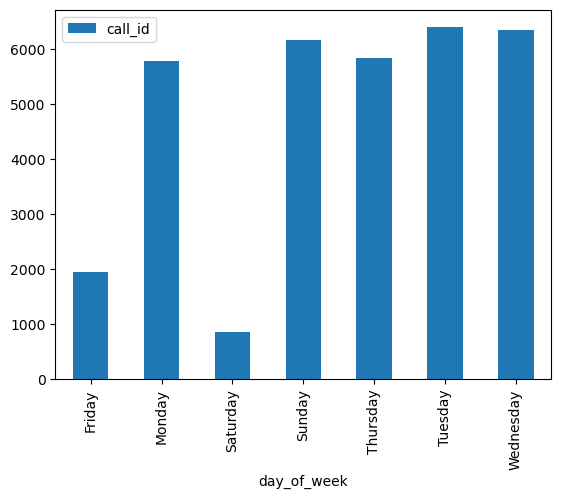

In [40]:
# Plotting a bar char for calls received on days of the week

df[['day_of_week', 'call_id']].groupby('day_of_week').count().plot.bar()

<AxesSubplot:xlabel='date'>

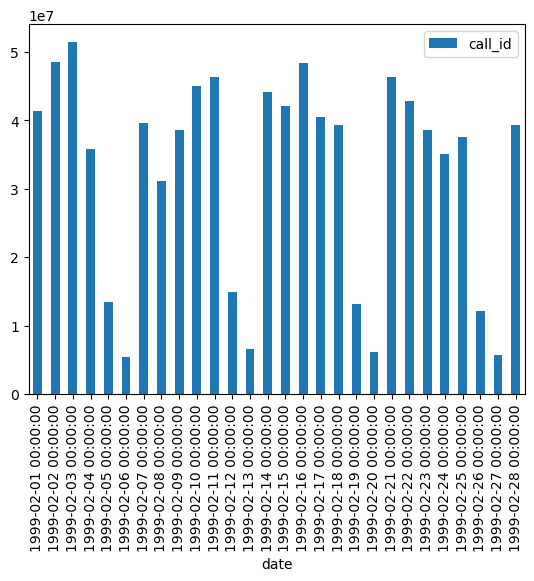

In [41]:
# Plotting a bar chart for calls received on dates of month

df[['date', 'call_id']].groupby('date').sum().plot.bar()

# -------------------------------------------------------------------------------------------------------------

# Count Plots:

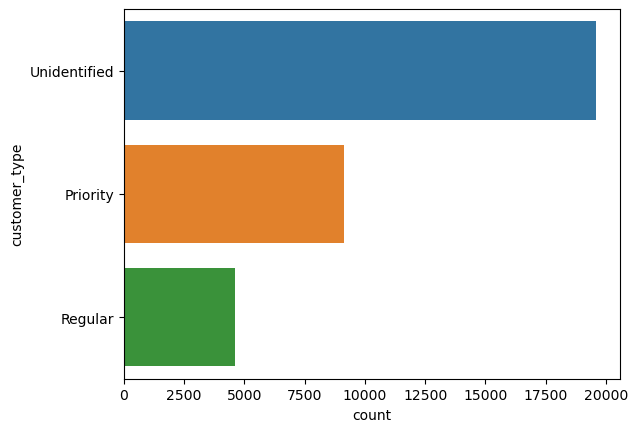

In [42]:
# count plot for calls received by types of customers
sns.countplot(y =df['customer_type'], data = df)
 
# Show the plot
plt.show()

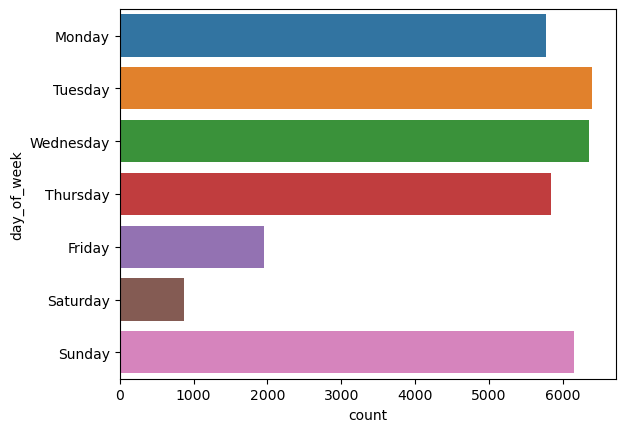

In [43]:
# count plot for calls received of days of the week
sns.countplot(y =df['day_of_week'], data = df)
 
# Show the plot
plt.show()

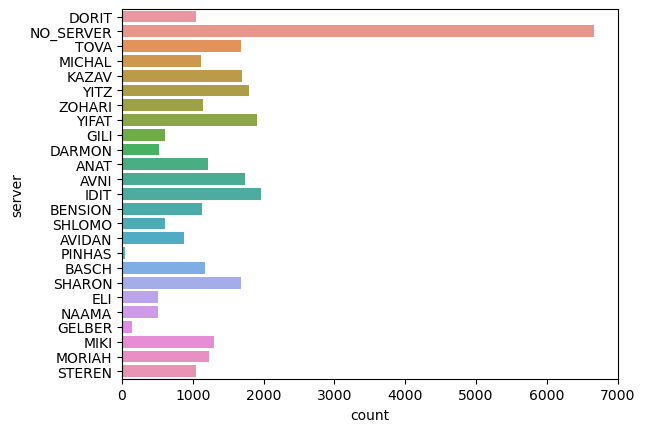

In [44]:
# count plot on single categorical variable
# Plot for calls received to agents

sns.countplot(y =df['server'], data = df)
 
# Show the plot
plt.show()

In [65]:
# Call count based on outcome

df[['outcome', 'call_id']].groupby('outcome')['call_id'].count()

outcome
AGENT      27162
HANG        5904
PHANTOM      278
Name: call_id, dtype: int64

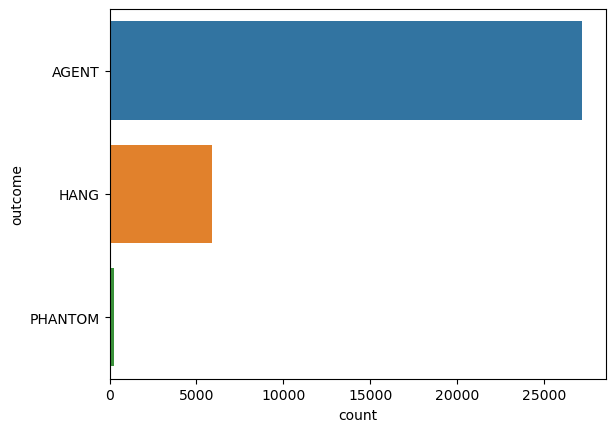

In [45]:
# count plot on single categorical variable
# Plot for checking the outcome of calls received

sns.countplot(y =df['outcome'], data = df)
 
# Show the plot
plt.show()

In [46]:
# Let's check for skewness 

df.skew(axis = 0, skipna = True)

call_id                -1.001455
customer_id            45.161956
priority                0.654634
penalty_on_qtime        2.816483
total_qtime_penalty     6.604624
call_dis_penalty        1.956518
total_penalty           2.270534
dtype: float64

# Histogram chart

array([[<AxesSubplot:title={'center':'call_id'}>,
        <AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'priority'}>],
       [<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'vru_entry'}>,
        <AxesSubplot:title={'center':'vru_exit'}>],
       [<AxesSubplot:title={'center':'q_start'}>,
        <AxesSubplot:title={'center':'q_exit'}>,
        <AxesSubplot:title={'center':'ser_start'}>],
       [<AxesSubplot:title={'center':'ser_exit'}>,
        <AxesSubplot:title={'center':'penalty_on_qtime'}>,
        <AxesSubplot:title={'center':'total_qtime_penalty'}>],
       [<AxesSubplot:title={'center':'call_dis_penalty'}>,
        <AxesSubplot:title={'center':'total_penalty'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=o

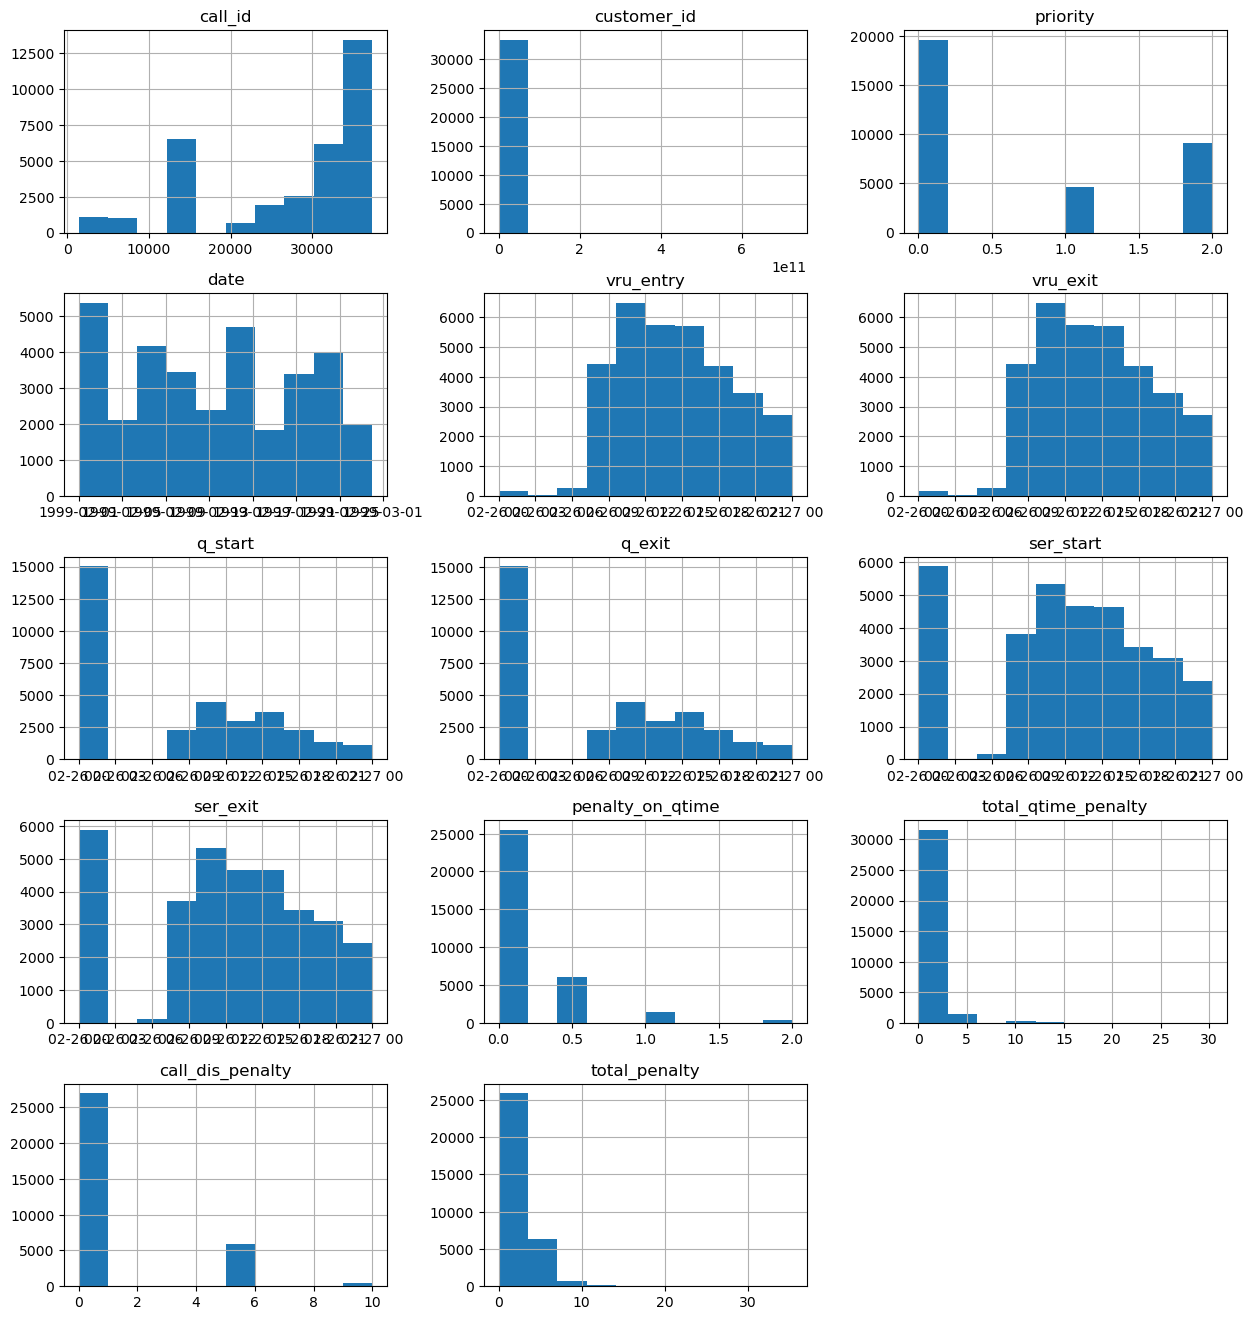

In [47]:
# Histogram Plot 

df.hist(figsize=(15,30),layout=(9,3))

# Scatter Plot:

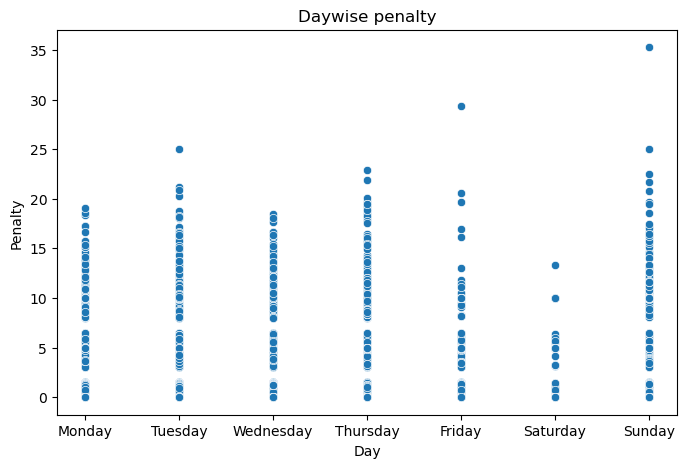

In [48]:
# Scatter plot for penalty paid on days of the week

plt.figure(figsize=(8,5))
plt.title('Daywise penalty')
plt.xlabel('Day')
plt.ylabel('Penalty')
sns.scatterplot(df['day_of_week'],df['total_penalty'])
plt.show()

# Density Plot

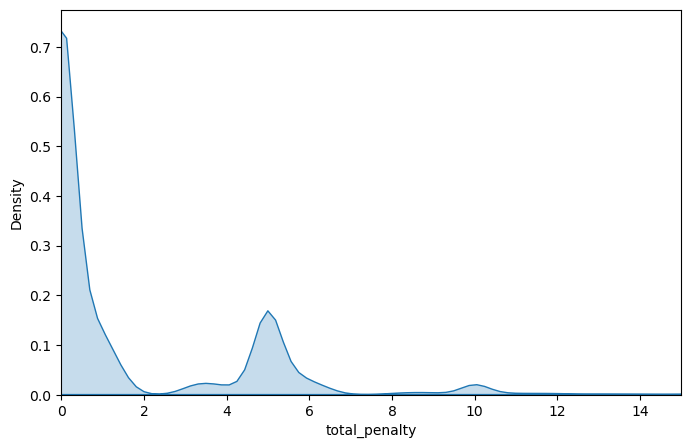

In [49]:
# Density plot

plt.figure(figsize=(8,5))
plt.xlim(0,15)
plt.xlabel('total_penalty')
plt.ylabel('Density')
sns.kdeplot(df['total_penalty'],shade=True)
plt.show()

# Box Plot

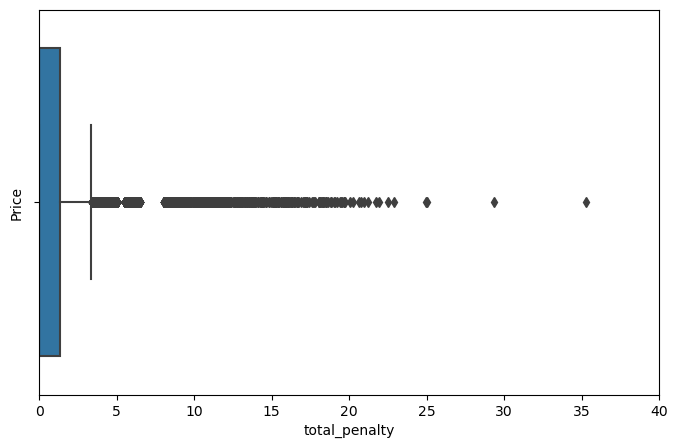

In [50]:
# box plot

plt.figure(figsize=(8,5))
plt.xlim(0,40)
plt.ylabel('Price')
sns.boxplot(x=df['total_penalty'])
plt.show()

# Comparing Means

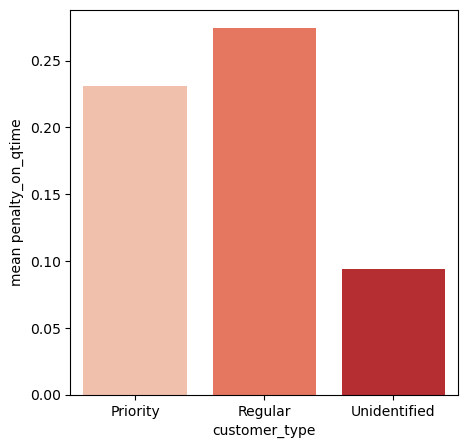

In [51]:
# Comparing mean qtime penalty paid against each type of customer

def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(5,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

compare_means(df,'customer_type','penalty_on_qtime')

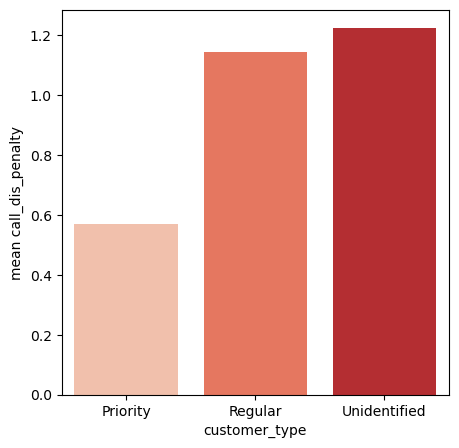

In [52]:
# Comparing mean call disconnection penalty paid against each type of customer

def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(5,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

compare_means(df,'customer_type','call_dis_penalty')

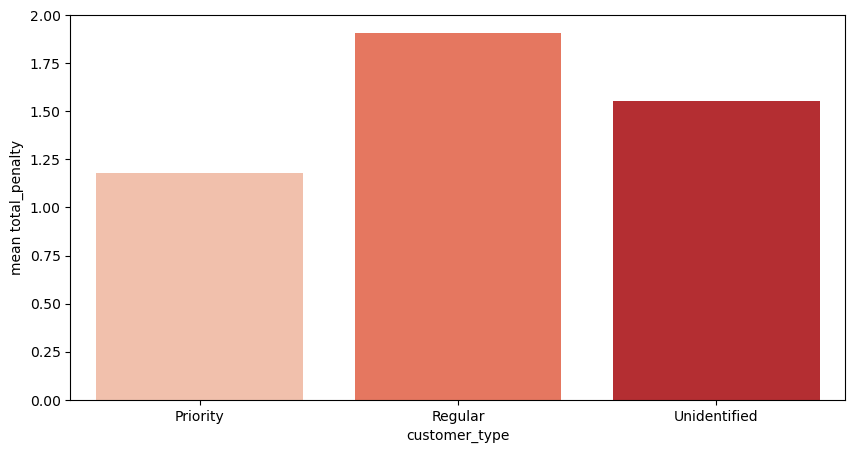

In [53]:
# Comparing mean penalty paid against each type of customer

def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(10,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

compare_means(df,'customer_type','total_penalty')

# Heat Map:

<AxesSubplot:>

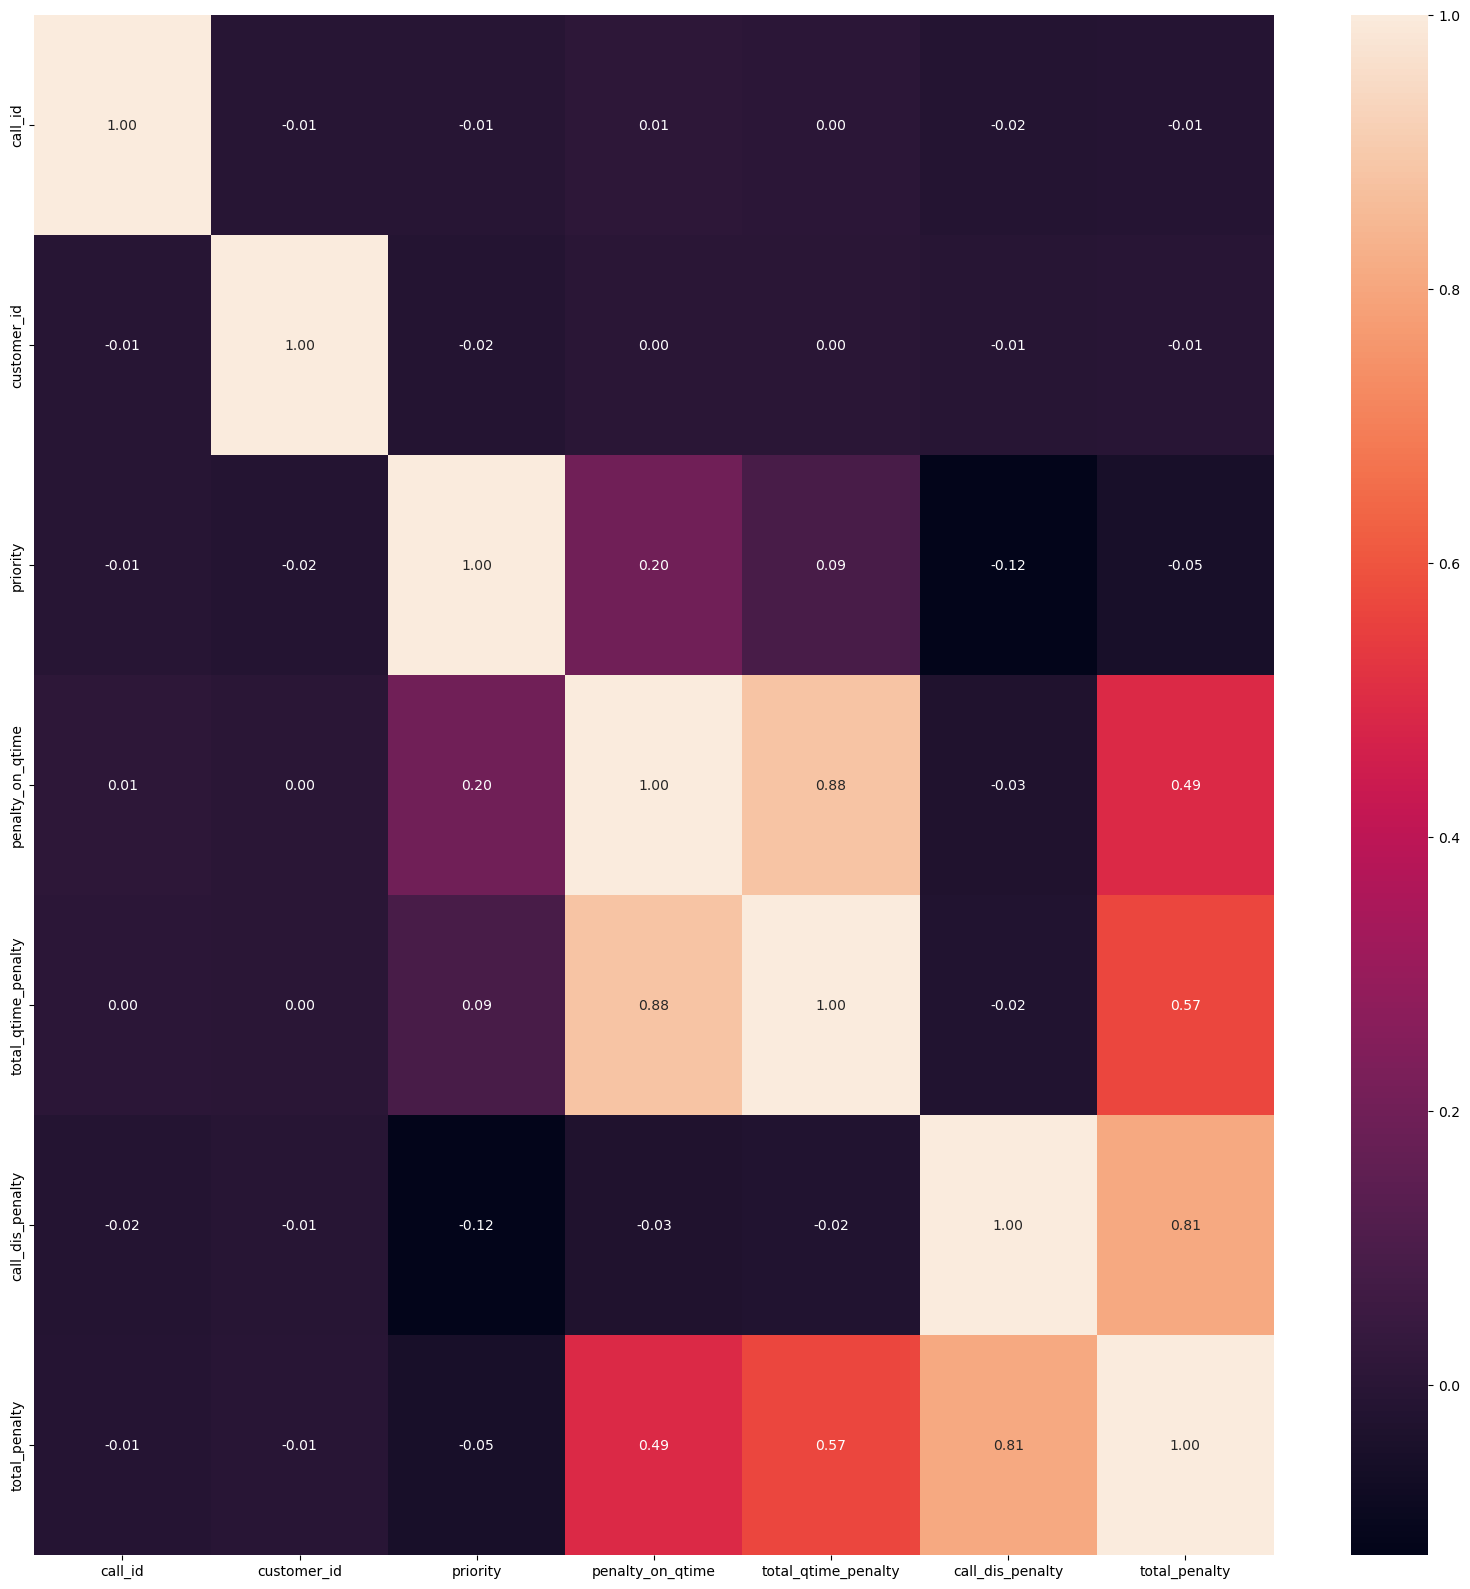

In [54]:
# Heat map showing corelation among the columns

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')

# ------------------------------------------------------------------------------------------------------------

# Questionaire:

# Q.1. count the agents in BPO

In [56]:
df['server'].nunique()

# this includes NO_SERVER, thus it means that there are 24 agents

25

# Q.2. Count how many call for internet consulting were hung up by customer despite availabilty of server?

In [87]:
df[(df['type'] == 'IN') & (df['outcome'] == 'HANG') & (df['server'] != 'NO_SERVER')].count()

vru+line               0
call_id                0
customer_id            0
priority               0
type                   0
date                   0
vru_entry              0
vru_exit               0
q_start                0
q_exit                 0
outcome                0
ser_start              0
ser_exit               0
server                 0
vru_time               0
q_time                 0
ser_time               0
customer_type          0
penalty_on_qtime       0
total_qtime_penalty    0
call_dis_penalty       0
total_penalty          0
day_of_week            0
dtype: int64

In [58]:
df[(df['outcome'] == 'HANG') & (df['server'] != 'NO_SERVER')][df['type'] == 'IN'].count()

vru+line               0
call_id                0
customer_id            0
priority               0
type                   0
date                   0
vru_entry              0
vru_exit               0
q_start                0
q_exit                 0
outcome                0
ser_start              0
ser_exit               0
server                 0
vru_time               0
q_time                 0
ser_time               0
customer_type          0
penalty_on_qtime       0
total_qtime_penalty    0
call_dis_penalty       0
total_penalty          0
day_of_week            0
dtype: int64

# Q.3. How many phantom calls were assigned to agents?

In [59]:
df[(df['outcome'] == 'PHANTOM') & (df['server'] != 'NO_SERVER')].count()

vru+line               0
call_id                0
customer_id            0
priority               0
type                   0
date                   0
vru_entry              0
vru_exit               0
q_start                0
q_exit                 0
outcome                0
ser_start              0
ser_exit               0
server                 0
vru_time               0
q_time                 0
ser_time               0
customer_type          0
penalty_on_qtime       0
total_qtime_penalty    0
call_dis_penalty       0
total_penalty          0
day_of_week            0
dtype: int64

# Q.4. Which agent has the highest avg service time?

In [60]:
# df[['server', 'ser_time']].groupby('server')['ser_time'].mean()

df[['server', 'ser_time']].groupby('server')['ser_time'].mean().nlargest(1)

server
PINHAS   0 days 00:11:22.925000
Name: ser_time, dtype: timedelta64[ns]

# Q.5. Which agent has the least number of calls assigned?

In [61]:
df[['server', 'call_id']].groupby('server')['call_id'].count().nsmallest(1)

server
PINHAS    40
Name: call_id, dtype: int64

# Q.6. Which agent's customers had to wait for the longest in order to speak to the agent?

In [62]:
df[['server', 'q_time']].groupby('server')['q_time'].sum()

server
ANAT        0 days 09:58:12
AVIDAN      0 days 09:51:37
AVNI        0 days 22:33:31
BASCH       0 days 13:03:03
BENSION     0 days 10:23:56
DARMON      0 days 08:04:32
DORIT       0 days 10:34:52
ELI         0 days 05:22:16
GELBER      0 days 02:34:32
GILI        0 days 05:29:19
IDIT        0 days 18:11:45
KAZAV       1 days 00:48:49
MICHAL      0 days 13:00:34
MIKI        0 days 15:42:35
MORIAH      0 days 15:07:57
NAAMA       0 days 02:49:48
NO_SERVER   1 days 07:31:36
PINHAS      0 days 00:39:48
SHARON      0 days 23:20:16
SHLOMO      0 days 04:56:04
STEREN      0 days 15:15:17
TOVA        0 days 17:46:15
YIFAT       1 days 02:58:53
YITZ        0 days 21:42:51
ZOHARI      0 days 09:16:41
Name: q_time, dtype: timedelta64[ns]

In [63]:
df.groupby('server')['q_time'].sum().nlargest()

server
NO_SERVER   1 days 07:31:36
YIFAT       1 days 02:58:53
KAZAV       1 days 00:48:49
SHARON      0 days 23:20:16
AVNI        0 days 22:33:31
Name: q_time, dtype: timedelta64[ns]

# Q.7. Based on description of data, queuing time of Phantom calls should be the highest. Is this assumption correct? : YES

In [90]:
df[['outcome', 'q_time']].groupby('outcome')['q_time'].mean().nlargest(1)

# Yes, the assumption is  corrrect

outcome
PHANTOM   0 days 00:01:34.575539568
Name: q_time, dtype: timedelta64[ns]

# Q.8. Which of the following customers has made maximum number of calls (Chose customer ID)?

In [66]:
# creating a new dataframe max_calldf

max_calldf = df.where(df['customer_id']>0)

In [67]:
# dropping all nan values from it

max_calldf = max_calldf.dropna(axis = 0, how = 'all')

In [68]:
# change datatype 

max_calldf['call_id'] = max_calldf['call_id'].astype('int64')

In [69]:
# change datatype 

max_calldf['customer_id'] = max_calldf['customer_id'].astype('int64')

In [70]:
# Answer 

max_calldf[['customer_id', 'call_id']].groupby('customer_id')['call_id'].count().nlargest(2)

# here 2 customers made samae number of calls 
# In the quiz, I answered it as : 7191646 which was marked WRONG

customer_id
7191646     170
58704610    170
Name: call_id, dtype: int64

# Q.9. Calls from which of the following customers have been tagged as Phantom calls most number of times (Chose customer ID)?

In [71]:
max_calldf[max_calldf["outcome"] == 'PHANTOM'].groupby(["customer_id"])["outcome"].count().nlargest(1)

customer_id
13408620    3
Name: outcome, dtype: int64

# Q.10. What percentage of high priority customer calls have been hung?

In [72]:
# Total priority customers 

df[df['priority'] == 2]['priority'].count()

9119

In [73]:
# Total priority customers whose call were hung

df[(df['outcome'] == 'HANG') & (df['customer_type'] == 'Priority')]['customer_type'].count()

909

In [74]:
# answer

(df[(df['outcome']== 'HANG') & (df['priority'] == 2)]['priority'].count() / df[df['priority'] == 2]['priority'].count())*100

9.968198267353877

# Q.11. How many high priority customer calls have been tagged as Phantom?

In [75]:
# answer

(df[(df['outcome']== 'PHANTOM') & (df['priority'] == 2)]['priority'].count() / df[df['priority'] == 2]['priority'].count())*100

1.1953065029060204

# Q.12. Queuing time of high priority customers is shortest

In [76]:
# Assumption is FALSE.

df.groupby('customer_type')['q_time'].mean()

customer_type
Priority       0 days 00:01:04.495339401
Regular        0 days 00:01:12.987021414
Unidentified   0 days 00:00:15.056983981
Name: q_time, dtype: timedelta64[ns]

# Q13. High priority customers are focussed more by the agents with more time spent on servicing them.

In [77]:
# Assumption is TRUE

df.groupby('customer_type')['ser_time'].mean()

customer_type
Priority       0 days 00:02:51.776181598
Regular        0 days 00:01:42.035907419
Unidentified   0 days 00:01:11.037547189
Name: ser_time, dtype: timedelta64[ns]

# Q14. Average VRU time for high priority customers is the highest.

In [78]:
# Assumption is FALSE

df.groupby('customer_type')['vru_time'].mean()

customer_type
Priority       0 days 00:00:05.533501480
Regular        0 days 00:00:05.293099718
Unidentified   0 days 00:00:13.976992143
Name: vru_time, dtype: timedelta64[ns]

# Q15. Which of the following agents have received maximum number of high priority calls?

In [85]:
# Answer is Kazav

df[(df['priority'] == 2)].groupby('server')['server'].count().nlargest().iloc[1:2]

server
KAZAV    705
Name: server, dtype: int64

# --------------------------------------------------------------------------------------------------

# Converting all the time realted columns

df['vru_time'] = df['vru_time'].astype(str).str.slice(7,15)

df['vru_entry'] = df['vru_entry'].astype(str).str.slice(11,19)
df['vru_exit'] = df['vru_exit'].astype(str).str.slice(11,19)

df['q_time'] = df['q_time'].astype(str).str.slice(7,15)

df['q_start'] = df['q_start'].astype(str).str.slice(11,19)
df['q_exit'] = df['q_exit'].astype(str).str.slice(11,19)

df['ser_time'] = df['ser_time'].astype(str).str.slice(7,15)

df['ser_start'] = df['ser_start'].astype(str).str.slice(11,19)
df['ser_exit'] = df['ser_exit'].astype(str).str.slice(11,19)

# -------------------------------------------------------------------------------------------------------------

In [80]:
df

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,...,server,vru_time,q_time,ser_time,customer_type,penalty_on_qtime,total_qtime_penalty,call_dis_penalty,total_penalty,day_of_week
0,AA0101,34536,0.0,0,PS,1999-02-01,2023-02-26 07:02:47,2023-02-26 07:02:56,2023-02-26 00:00:00,2023-02-26 00:00:00,...,DORIT,0 days 00:00:09,0 days 00:00:00,0 days 00:02:46,Unidentified,0.0,0.00,0,0.00,Monday
1,AA0101,34537,0.0,0,PS,1999-02-01,2023-02-26 07:31:45,2023-02-26 07:31:55,2023-02-26 00:00:00,2023-02-26 00:00:00,...,NO_SERVER,0 days 00:00:10,0 days 00:00:00,0 days 00:00:05,Unidentified,0.0,0.00,10,10.00,Monday
2,AA0101,34538,0.0,0,NW,1999-02-01,2023-02-26 07:54:38,2023-02-26 07:54:51,2023-02-26 00:00:00,2023-02-26 00:00:00,...,TOVA,0 days 00:00:13,0 days 00:00:00,0 days 00:01:32,Unidentified,0.0,0.00,0,0.00,Monday
3,AA0101,34539,23317894.0,2,PS,1999-02-01,2023-02-26 08:09:16,2023-02-26 08:09:22,2023-02-26 08:09:22,2023-02-26 08:09:27,...,NO_SERVER,0 days 00:00:06,0 days 00:00:05,0 days 00:00:00,Priority,0.0,0.00,5,5.00,Monday
4,AA0101,34540,48178511.0,2,PS,1999-02-01,2023-02-26 08:19:42,2023-02-26 08:19:47,2023-02-26 08:19:47,2023-02-26 08:20:21,...,MICHAL,0 days 00:00:05,0 days 00:00:34,0 days 00:01:44,Priority,0.0,0.00,0,0.00,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,AA0216,5607,0.0,0,IN,1999-02-26,2023-02-26 14:14:43,2023-02-26 14:15:05,2023-02-26 00:00:00,2023-02-26 00:00:00,...,NO_SERVER,0 days 00:00:22,0 days 00:00:00,0 days 00:00:00,Unidentified,0.0,0.00,5,5.00,Friday
33340,AA0216,5608,0.0,0,IN,1999-02-26,2023-02-26 14:33:45,2023-02-26 14:33:50,2023-02-26 00:00:00,2023-02-26 00:00:00,...,NO_SERVER,0 days 00:00:05,0 days 00:00:00,0 days 00:00:00,Unidentified,0.0,0.00,5,5.00,Friday
33341,AA0216,5609,0.0,0,IN,1999-02-28,2023-02-26 11:29:39,2023-02-26 11:29:48,2023-02-26 11:29:48,2023-02-26 11:33:39,...,NO_SERVER,0 days 00:00:09,0 days 00:03:51,0 days 00:00:00,Unidentified,1.0,3.85,5,8.85,Sunday
33342,AA0216,5610,0.0,0,IN,1999-02-28,2023-02-26 12:18:20,2023-02-26 12:18:30,2023-02-26 12:18:30,2023-02-26 12:18:49,...,YITZ,0 days 00:00:10,0 days 00:00:19,0 days 00:04:06,Unidentified,0.0,0.00,0,0.00,Sunday


# ----------------------------------------------------------------------------------------------------

# Insights:

- Noticably, there is a difference in amount that was billed earlier and the amount that was generated after the audit.

- We observe that Calls received on friday and saturaday are comparatively lower than other days

- Most calls received are Unidentified

- Major number of the calls do not find an agent

- Average q_time penalty is higher for regular customers

- Average call disconnection penalty is higher for Unidentified customers

- Howeever, the total penalty is higher for regular customers

- There are 24 agents which is different from the number told.